# PatchSAE Demo

In [1]:
from src.demo.core import SAETester
from tasks.utils import (
    get_all_classnames,
    get_max_acts_and_images,
    get_sae_and_vit,
    load_datasets,
)

/Users/hyesulim/miniconda3/envs/patchsae/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
datasets = load_datasets()
classnames = get_all_classnames(datasets, data_root="configs/classnames")

In [38]:
root = "out/feature_data"
sae_runname = "sae_base"
vit_name = "base"

# ------------------------ base ------------------------
sae_path = "data/sae_weight/base/out.pt"
sae, vit, cfg = get_sae_and_vit(
    sae_path=sae_path,
    vit_type="base",
    device="cpu",
    backbone="openai/clip-vit-base-patch16",
    model_path=None,
    classnames=None,
)
max_act_imgs, mean_acts = get_max_acts_and_images(datasets, root, sae_runname, vit_name)

# ------------------------ maple ------------------------
# sae_path = "data/sae_weight/base/out.pt"
# config_path = "configs/models/maple/vit_b16_c2_ep5_batch4_2ctx.yaml"
# model_path="data/clip/maple/imagenet/model.pth.tar-2"
# sae, vit, cfg = get_sae_and_vit(sae_path=sae_path, vit_type='maple', device='cpu', model_path=model_path,config_path=config_path, backbone='openai/clip-vit-base-patch16', classnames=classnames["imagenet"])
# max_act_imgs, mean_acts = get_max_acts_and_images(datasets, root, sae_runname, vit_name)

In [39]:
sae_clip = SAETester(vit, cfg, sae, mean_acts, max_act_imgs, datasets, classnames)

In [40]:
# image_url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image_url = "data/image/sun-alley.jpg"
sae_clip.register_image(image_url)

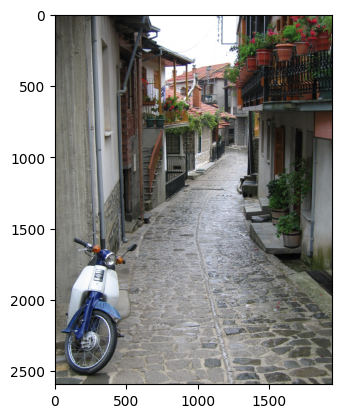

In [41]:
sae_clip.show_input_image()

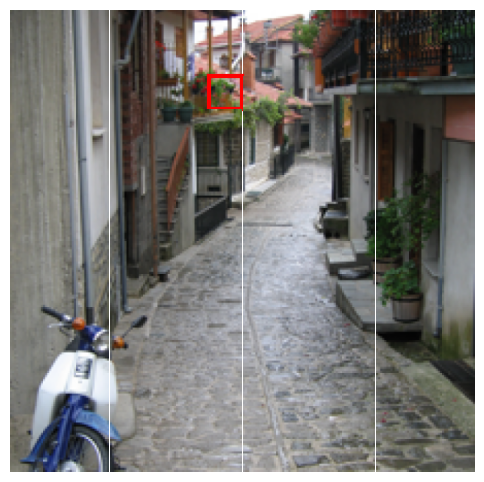

Union of top 2 neurons: [24777   842]


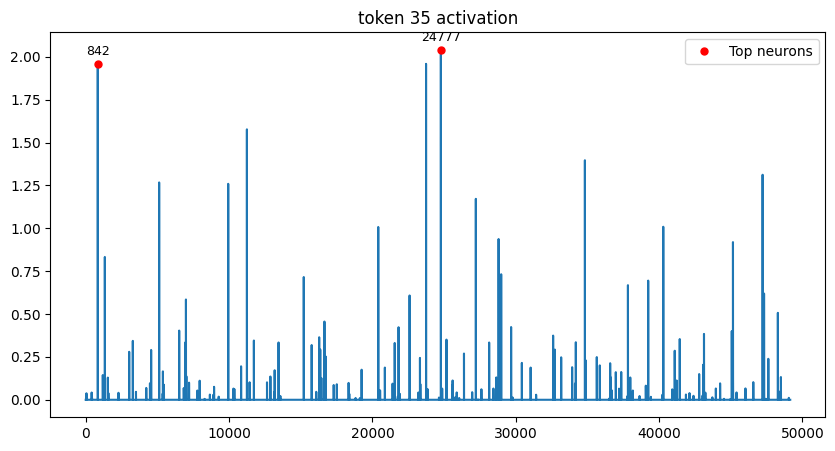

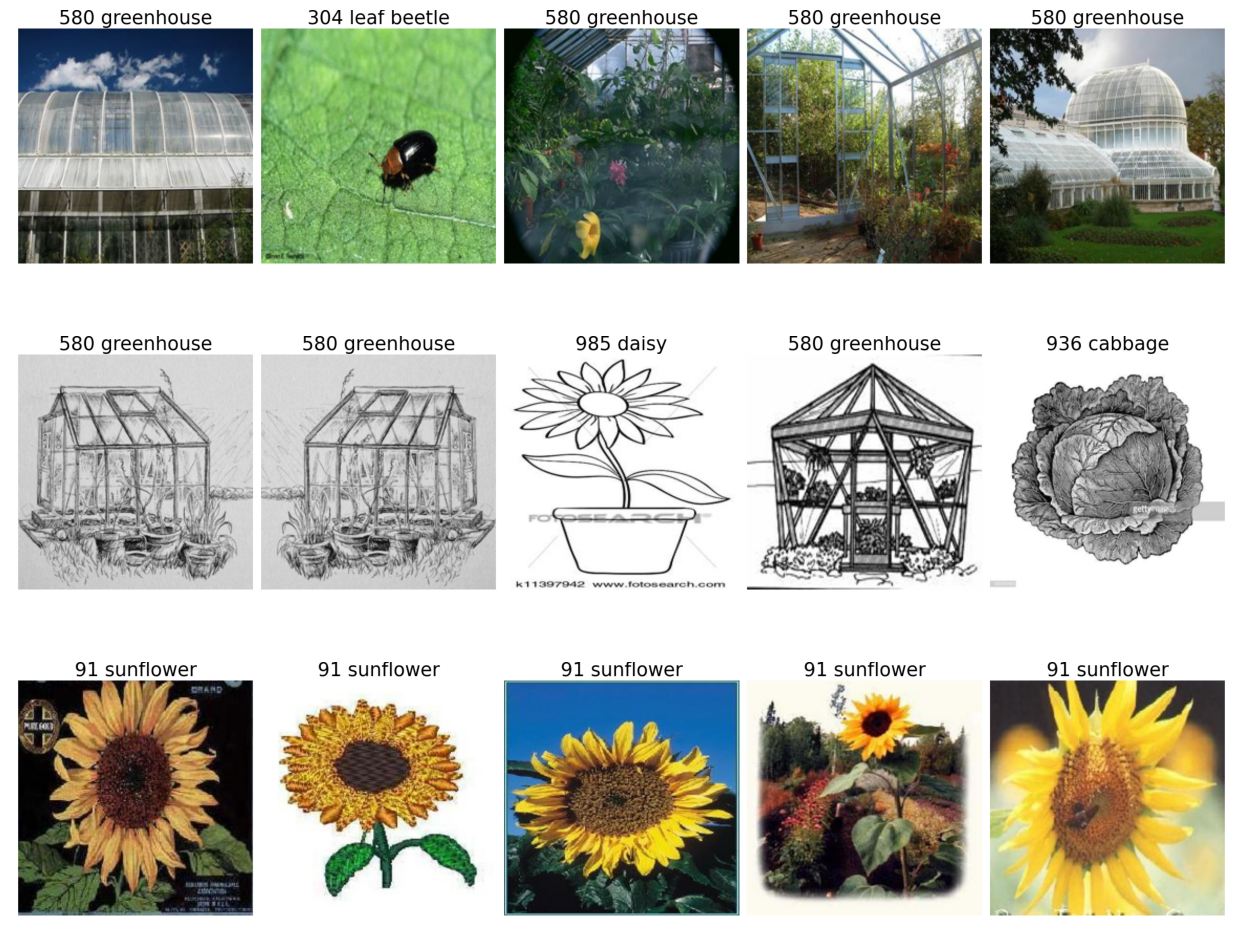

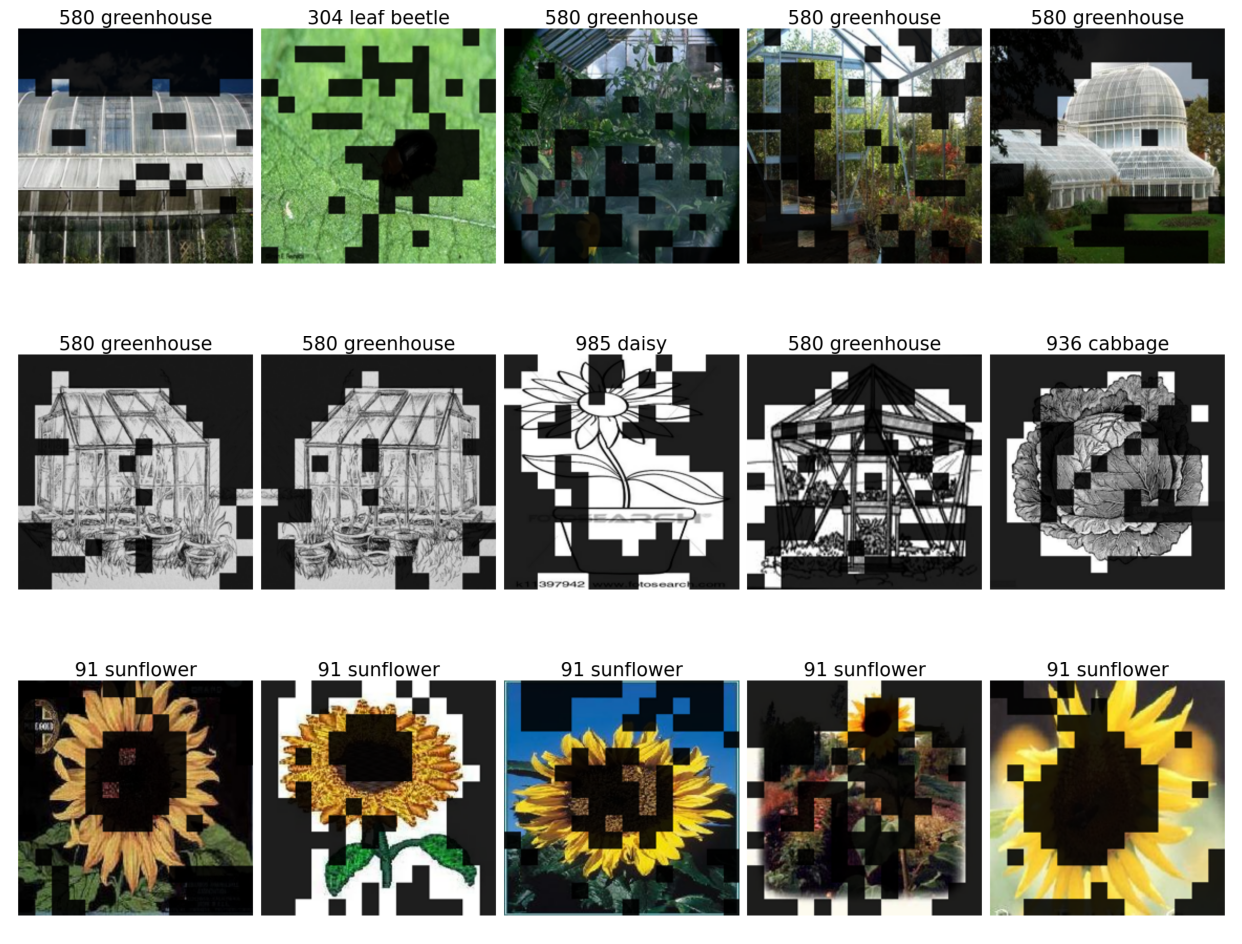

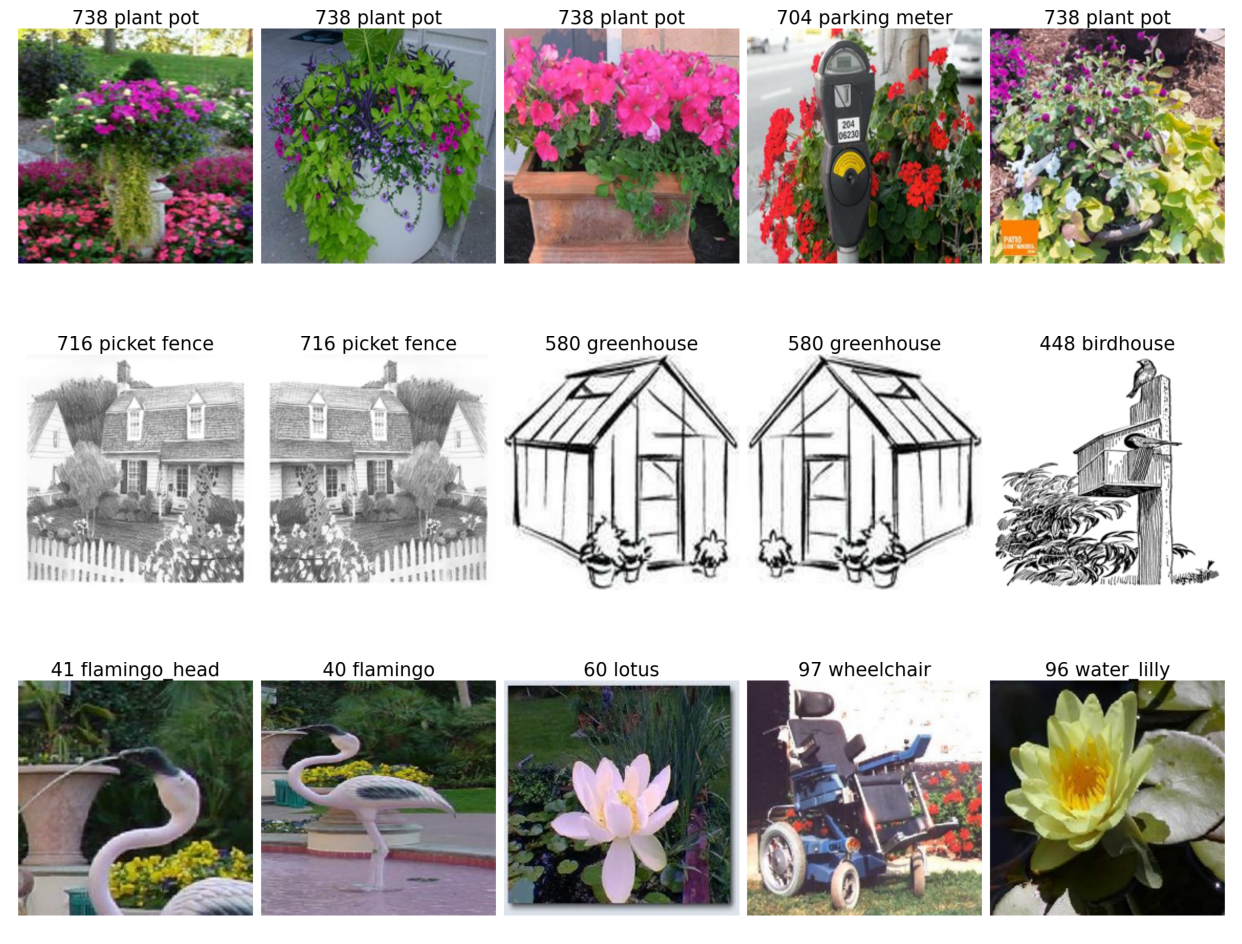

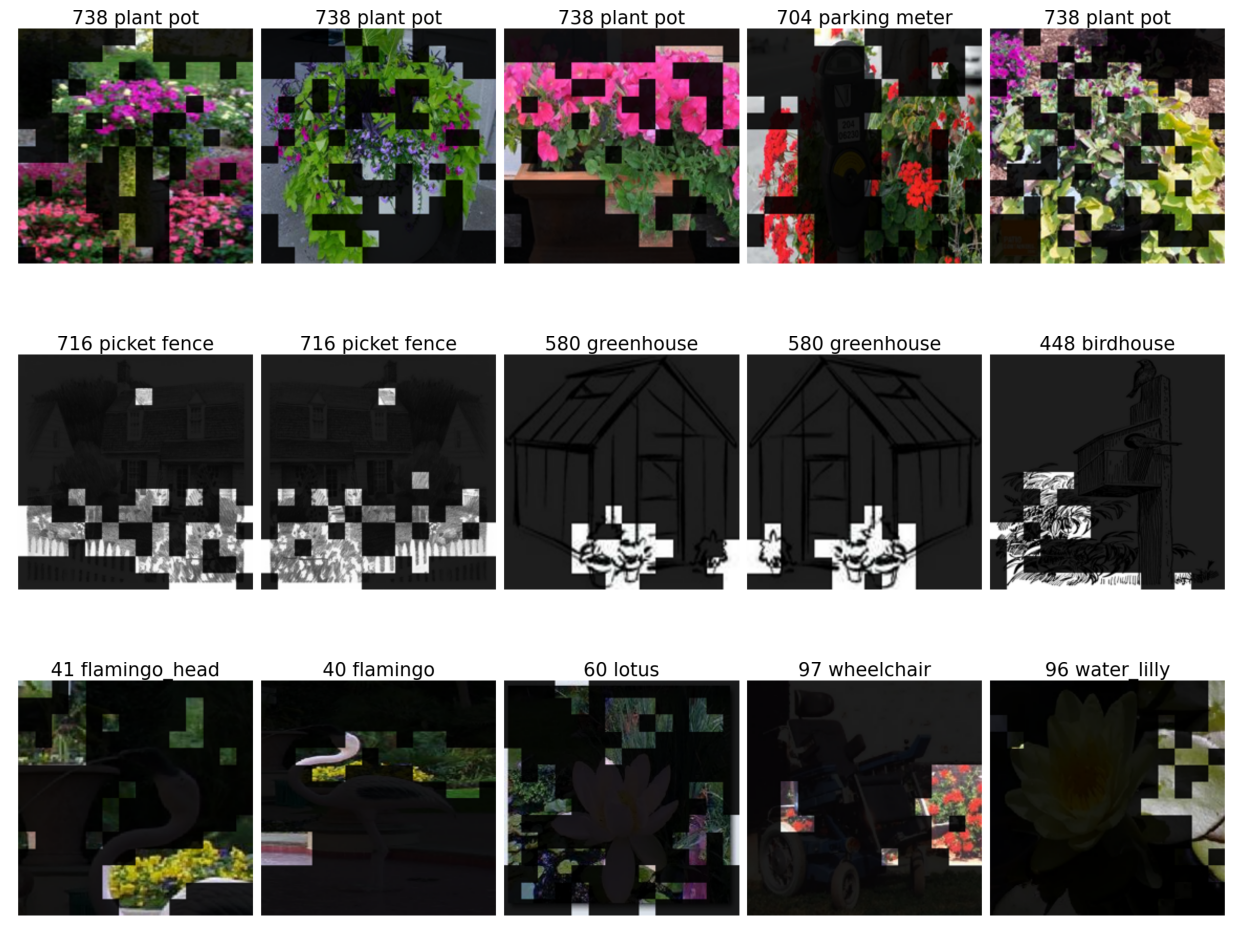

In [42]:
sae_clip.run(highlight_patch_idx=35, top_k=2, num_images=5)